# Capstone Project: The Battle of Neighborhoods - Exploring Rent in Cities Experiencing Growth Due to the Technonology Industry

![alt text](San_Jose.jpg "San Jose, California")

### Introduction and Background:

### Over the last decade cities have been experiancing a boom as industry giants and start ups in the tech industry move into new locations and with them bring a wave of young tech workers. This change has brought tension with city locals as rent in those areas sky rocket, sometimes even forcing locals to move. It also excludes workers from other industries from moving and participating in the cities functions. Affordable housing affects everyone and can still be a problem even if you are in the tech industry. For the purposes of this notebook I am going to assume the role of a young tech worker just starting out who wants to move to one of the cities experiencing a industry boom. Despite my foucs on tech this notebook can be used by people in other industrys. The contents of this notebook can be used by a variety of different stakeholders who may be looking to compare rent prices in different cities as well as the local ammenities in the area. For the purpose of this assignment I want to know which city has the most affordable housing, lowest crime, and best city ammenities. 

### Description and Use of Data:

### Current and historical rent data was obtained from the website Apartment List (https://www.apartmentlist.com/rentonomics/rental-price-data/). I will be using the most recent data (from March 2020) to determine which city has the cheapest rent and then use historical data as part of my analysis of rent in the cities. I used a 2019 analysis by Indeed which sought to find which tech hub cities had the most job posting and as such the most overall growth in the sector to determine which cities to base my apartment search on (https://www.hiringlab.org/2019/04/18/tech-hubs-2019/). In an effort to cut down on analysis and have variety I will only work with the top 5 cities that are not in the same state. As such San Jose (number 1) had more job postings than San Francisco (number 4) so I will be using that city in my analysis. When I am comparing the cities amenities I will only compare the top 2 cities based on price to cut down on analysis.  
### List of Citys based on Indeed Tech Job Postings: 
#### 1. San Jose, CA 
#### 2. Washington, D.C. 
#### 3. Seattle, WA 
#### 4. Baltimore, MD 
#### 5. Raleigh, NC 

### Crime statistics for the two remaining cities will be collected from their respective police departments and analyzed for location of crime and types of crimes committed to give a general idea of what neighboorhoods in the city are preferable as well as what you can expect while living there. 

### Foursquare location data will be used to compare amenities in the city which would lead to better overall knowledge of the area in each city and not just leave decesion making up solely up to rent prices and crime. 

### Note About the Report: The sections of analysis have been divided into four parts. I decided it makes more sense for the result section to be split into four as well and displayed at the end of the section of origin with the appropriate graphs. The methodology section will be displayed below and be relavent to each section. The final discussion and conclusion can be found at the end.

### Methodology:

### Data was obtained from orginal data sources and links were provided to each source for viewers convenience. Data was cleaned to remove clutter and present the target variables in graphs and tables. In section 2 of this report historical data was used to show trends in changes in rent. Indivdual graphs were created from the original showing the apartment types trend in rent price. In section 3 assumptions were made to help determine which neighborhoods were in a reasonable price range. Assuming the tech worker is an entry level data scientist. According to Ziprecruiter he can expect a possible salary of about 60,978 dollars in Baltimore (https://www.ziprecruiter.com/Salaries/How-Much-Does-an-Entry-Level-Data-Scientist-Make-a-Year-in-Baltimore,MD). While in Raleigh this worker can expect 58,528 dollars (https://www.ziprecruiter.com/Salaries/How-Much-Does-an-Entry-Level-Data-Scientist-Make-a-Year-in-Raleigh,NC). Most personal fianance experts suggest spending no more than one-third of your monthly income on rent. That means in Baltimore with an entry level salary you do not want to spend more than 1089.33 dollars (taxes included) a month on rent which is well within reason based off the average rent. Raleigh's possible pay as a data scientist is below the national average but the cost of living is relatively cheap. In this case you don't want to spend more than 1186.00 dollars (taxes included) on rent. Again, this is well within reason for rent in that area. Tax calulations were done through: (https://smartasset.com/taxes/paycheck-calculator#BW5I2MPPSm) assumptions were made such as being payed bi-weekly and that the person is single. If you don't meet these qualifications please adjust your post-tax income. Apartment list while useful, only includes rent up to a State level. However, rent in a state can vary. Rent in the middle of Manhattan, NY is not the same as in Buffalo, NY. Another resource was used to fill this gap in information. In order to better visualize what rent is like in the city rent data by neighborhood was gathered from Rent Cafe for Baltimore: (https://www.rentcafe.com/average-rent-market-trends/us/md/baltimore-city/) and Raleigh: (https://www.rentcafe.com/average-rent-market-trends/us/nc/raleigh/). This information was used to narrow down the search for the cheapest place to live and to decide on which neighborhoods are worth exploring using Foursquare. For crime related information used in section 3 the data sets were obtained from the appropriate police department websites. Columns in these datasets were removed prior to uploading due to technical difficulties. Both police departments have differences in how they store their data with Baltimore having a larger dataset going back to 2014 while Raleigh's dataset is more recent and does not go as far back.

# Section 1: Determining which State is of Interest

## Clean and filter data

In [8]:
#Import the important stuff
import pandas as pd
import numpy as np

In [23]:
rent = pd.read_csv("Rent Data 1.csv")
rent.head()

,Location,Location_Type,Year,Month,Price_Studio,Price_1br,Price_2br,Price_3br,Price_4br,Price_Change_MoM,Price_Change_YoY
0,National,National,2020,3,843,965,1197,1607,1873,0.2,1.9
1,Alabama,State,2020,3,629,685,832,1111,1293,0.2,3.3
2,Alaska,State,2020,3,819,936,1197,1692,2031,0.3,1.1
3,Arizona,State,2020,3,740,874,1105,1597,1853,0.2,3.5
4,Arkansas,State,2020,3,530,577,729,989,1158,0.1,0.6


In [24]:
#Dataset includes the national average as part of its data which we dont want so it is being removed
indexNames = rent[rent['Location_Type'] == 'National'].index
rent.drop(indexNames, inplace = True)
rent.head()

,Location,Location_Type,Year,Month,Price_Studio,Price_1br,Price_2br,Price_3br,Price_4br,Price_Change_MoM,Price_Change_YoY
1,Alabama,State,2020,3,629,685,832,1111,1293,0.2,3.3
2,Alaska,State,2020,3,819,936,1197,1692,2031,0.3,1.1
3,Arizona,State,2020,3,740,874,1105,1597,1853,0.2,3.5
4,Arkansas,State,2020,3,530,577,729,989,1158,0.1,0.6
5,California,State,2020,3,1239,1457,1858,2574,2990,0.1,1.8


In [25]:
#The dataset also includes state averages which are also unnecessary
indexLoc = rent[rent['Location_Type'] == 'State'].index
rent.drop(indexLoc, inplace = True)
rent.head()

,Location,Location_Type,Year,Month,Price_Studio,Price_1br,Price_2br,Price_3br,Price_4br,Price_Change_MoM,Price_Change_YoY
51,"Abilene, TX",City,2020,3,603,657,873,1092,1454,0.3,0.9
52,"Acworth, GA",City,2020,3,891,934,1079,1417,1741,0.1,2.0
53,"Adelanto, CA",City,2020,3,855,1023,1280,1799,2216,0.0,-1.0
54,"Aiken, SC",City,2020,3,642,707,851,1158,1500,-0.1,2.1
55,"Albany, NY",City,2020,3,753,892,1098,1374,1514,-0.1,0.1


In [ ]:
#Ended up dropping the whole column (should have done that first!) also dropped year and month since 
#I already explained in the intro when the dataset was created
rent.drop(['Location_Type','Year', 'Month'], axis = 1, inplace = True)

In [28]:
#Created a blank column for rent and ensured that the order of columns was the same
rent['State'] = ""
rent = rent[['Location', 'State', 'Price_Studio', 'Price_1br', 'Price_2br','Price_3br','Price_4br', 'Price_Change_MoM', 'Price_Change_YoY']]
rent.head()

,Location,State,Price_Studio,Price_1br,Price_2br,Price_3br,Price_4br,Price_Change_MoM,Price_Change_YoY
51,"Abilene, TX",,603,657,873,1092,1454,0.3,0.9
52,"Acworth, GA",,891,934,1079,1417,1741,0.1,2.0
53,"Adelanto, CA",,855,1023,1280,1799,2216,0.0,-1.0
54,"Aiken, SC",,642,707,851,1158,1500,-0.1,2.1
55,"Albany, NY",,753,892,1098,1374,1514,-0.1,0.1


In [29]:
#Attempted to move the second half (half is determined by ',') of the location column entry into the state column 
rent['Location'].str.split(', ')

51          [Abilene, TX]
52          [Acworth, GA]
53         [Adelanto, CA]
54            [Aiken, SC]
55           [Albany, NY]
              ...        
705          [Yakima, WA]
706      [Youngstown, OH]
707       [Ypsilanti, MI]
708    [Yucca Valley, CA]
709            [Zion, IL]
Name: Location, Length: 659, dtype: object

In [30]:
rent['Location'].str.split(', ').str[1]

51     TX
52     GA
53     CA
54     SC
55     NY
       ..
705    WA
706    OH
707    MI
708    CA
709    IL
Name: Location, Length: 659, dtype: object

In [31]:
rent['State'] = rent['Location'].str.split(', ').str[1]
rent

,Location,State,Price_Studio,Price_1br,Price_2br,Price_3br,Price_4br,Price_Change_MoM,Price_Change_YoY
51,"Abilene, TX",TX,603,657,873,1092,1454,0.3,0.9
52,"Acworth, GA",GA,891,934,1079,1417,1741,0.1,2.0
53,"Adelanto, CA",CA,855,1023,1280,1799,2216,0.0,-1.0
54,"Aiken, SC",SC,642,707,851,1158,1500,-0.1,2.1
55,"Albany, NY",NY,753,892,1098,1374,1514,-0.1,0.1
...,...,...,...,...,...,...,...,...,...
705,"Yakima, WA",WA,603,703,912,1258,1444,0.0,-0.2
706,"Youngstown, OH",OH,515,577,726,945,1050,0.0,0.1
707,"Ypsilanti, MI",MI,819,873,1053,1446,1813,0.3,2.5
708,"Yucca Valley, CA",CA,580,694,868,1219,1502,0.0,2.7


In [32]:
#The location column still had the state information so I removed that
rent['Location'].str.split(', ').str[0]

51          Abilene
52          Acworth
53         Adelanto
54            Aiken
55           Albany
           ...     
705          Yakima
706      Youngstown
707       Ypsilanti
708    Yucca Valley
709            Zion
Name: Location, Length: 659, dtype: object

In [33]:
rent['Location'] = rent['Location'].str.split(', ').str[0]
rent.head()

,Location,State,Price_Studio,Price_1br,Price_2br,Price_3br,Price_4br,Price_Change_MoM,Price_Change_YoY
51,Abilene,TX,603,657,873,1092,1454,0.3,0.9
52,Acworth,GA,891,934,1079,1417,1741,0.1,2.0
53,Adelanto,CA,855,1023,1280,1799,2216,0.0,-1.0
54,Aiken,SC,642,707,851,1158,1500,-0.1,2.1
55,Albany,NY,753,892,1098,1374,1514,-0.1,0.1


In [34]:
#Remove all other information that does not include the 5 cities that I am looking at
my_cities = rent[(rent['Location'] != 'San Jose') & (rent['Location'] != 'Seattle') & (rent['Location'] != 'Baltimore') &
                 (rent['Location'] != 'Raleigh') & (rent['Location'] != 'Washington')].index
rent.drop(my_cities, inplace = True)
rent.head()

,Location,State,Price_Studio,Price_1br,Price_2br,Price_3br,Price_4br,Price_Change_MoM,Price_Change_YoY
92,Baltimore,MD,782,951,1192,1533,1795,0.1,1.9
550,Raleigh,NC,820,1011,1168,1527,1866,0.3,2.1
591,San Jose,CA,1821,2141,2684,3725,4294,0.5,1.9
604,Seattle,WA,1185,1357,1690,2453,2917,0.5,1.9
677,Washington,DC,1304,1369,1582,2086,2587,0.3,2.3


### Using the table above find the difference in rent between the lowest cost areas, Baltimore and Raleigh.

In [46]:
#Calculate the difference between different apartment types for Baltimore and Raleigh
print("Difference between studio apartments:", 820 - 782)
print("Difference between 1 bedroom apartments:", 1011 - 951)
print("Difference between 2 bedroom apartments:", 1192 - 1168)
print("Difference between 3 bedroom apartments:", 1533 - 1527)
print("Difference between 4 bedroom apartments:", 1866 - 1795)

Difference between studio apartments: 38
Difference between 1 bedroom apartments: 60
Difference between 2 bedroom apartments: 24
Difference between 3 bedroom apartments: 6
Difference between 4 bedroom apartments: 71


In [47]:
#Average difference in rent
print("Average difference difference in rent between all apartment types:",(38+60+24+6+71)/5)

Average difference difference in rent between all apartment types: 39.8


### Results Discussion for Section 1:

### Based on the cleaned table it appears that Baltimore has the lowest rent until you get to a 2 bedroom apartment. Raleigh narrowly beats Baltimore for lowest rent for a 3 bedroom apartment before it switches back to Baltimore at a 4 bedroom apartment. Across all states it appears that rent increases about 2% each year with Washington, DC having the largest change at 2.3%. Baltimore has the lowest month to month change while San Jose and Seattle are tied for the greatest change. There is overall a 40 dollar difference in rent between Baltimore and Raleigh which makes these areas comparable in price however, Raleigh has a higher change in price month to month as well as year to year. Meaning in the future you can expect to pay more if you move to Raleigh. 

# Section 2: Use Historical Data to Find Trends

In [5]:
#Historical rent data starts January 2014 and goes to March 2020 (current day)
hist = pd.read_csv('Historical Rent.csv')
hist.head()

,Location,Location_Type,State,Bedroom_Size,2014_01,2014_02,2014_03,2014_04,2014_05,2014_06,...,2019_06,2019_07,2019_08,2019_09,2019_10,2019_11,2019_12,2020_01,2020_02,2020_03
0,"San Jose, CA",City,CA,Studio,1432,1436,1445,1460,1472,1489,...,1813,1817,1817,1807,1802,1797,1797,1802,1812,1821
1,"San Jose, CA",City,CA,1br,1683,1687,1698,1716,1731,1750,...,2131,2135,2136,2124,2119,2112,2113,2118,2130,2141
2,"San Jose, CA",City,CA,2br,2110,2115,2129,2151,2169,2194,...,2671,2677,2677,2662,2655,2648,2648,2655,2670,2684
3,"San Jose, CA",City,CA,3br,2928,2936,2955,2986,3011,3045,...,3707,3715,3715,3696,3686,3675,3676,3685,3706,3725
4,"San Jose, CA",City,CA,4br,3376,3384,3406,3442,3471,3510,...,4273,4283,4283,4260,4249,4236,4237,4248,4272,4294


In [9]:
#Start by creating a plot of the data and see if there any obvious trends
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])

In [7]:
hist.drop(['Location_Type', 'State'], axis = 1, inplace = True)

In [8]:
hist.head()

,Location,Bedroom_Size,2014_01,2014_02,2014_03,2014_04,2014_05,2014_06,2014_07,2014_08,...,2019_06,2019_07,2019_08,2019_09,2019_10,2019_11,2019_12,2020_01,2020_02,2020_03
0,"San Jose, CA",Studio,1432,1436,1445,1460,1472,1489,1509,1533,...,1813,1817,1817,1807,1802,1797,1797,1802,1812,1821
1,"San Jose, CA",1br,1683,1687,1698,1716,1731,1750,1774,1801,...,2131,2135,2136,2124,2119,2112,2113,2118,2130,2141
2,"San Jose, CA",2br,2110,2115,2129,2151,2169,2194,2223,2258,...,2671,2677,2677,2662,2655,2648,2648,2655,2670,2684
3,"San Jose, CA",3br,2928,2936,2955,2986,3011,3045,3086,3134,...,3707,3715,3715,3696,3686,3675,3676,3685,3706,3725
4,"San Jose, CA",4br,3376,3384,3406,3442,3471,3510,3558,3613,...,4273,4283,4283,4260,4249,4236,4237,4248,4272,4294


In [9]:
#Create copys from original data frame containing just the indivdual bedroom sizes for each city
sdio = hist[(hist['Bedroom_Size'] != 'Studio')].index
studio_df = hist.drop(sdio, inplace = False)
br_one = hist[(hist['Bedroom_Size'] != '1br')].index
one_br_df = hist.drop(br_one, inplace = False)
br_two = hist[(hist['Bedroom_Size'] != '2br')].index
two_br_df = hist.drop(br_two, inplace = False)
br_three = hist[(hist['Bedroom_Size'] != '3br')].index
three_br_df = hist.drop(br_three, inplace = False)
br_four = hist[(hist['Bedroom_Size'] != '4br')].index
four_br_df = hist.drop(br_four, inplace = False)

In [10]:
studio_df.head()

,Location,Bedroom_Size,2014_01,2014_02,2014_03,2014_04,2014_05,2014_06,2014_07,2014_08,...,2019_06,2019_07,2019_08,2019_09,2019_10,2019_11,2019_12,2020_01,2020_02,2020_03
0,"San Jose, CA",Studio,1432,1436,1445,1460,1472,1489,1509,1533,...,1813,1817,1817,1807,1802,1797,1797,1802,1812,1821
5,"Baltimore, MD",Studio,739,740,740,742,744,746,749,750,...,790,787,781,774,776,778,781,781,782,782
10,"Seattle, WA",Studio,962,964,968,974,979,988,994,1001,...,1174,1183,1189,1191,1183,1178,1175,1176,1180,1185
15,"Washington, DC",Studio,1205,1202,1204,1211,1219,1223,1230,1228,...,1297,1300,1302,1300,1295,1294,1295,1296,1300,1304
20,"Raleigh, NC",Studio,682,682,683,688,693,696,700,704,...,819,824,826,825,819,817,816,816,818,820


In [11]:
#Drop the bedroom size column so that graphs can be made
studio_df.drop(['Bedroom_Size'], axis = 1, inplace = True)
one_br_df.drop(['Bedroom_Size'], axis = 1, inplace = True)
two_br_df.drop(['Bedroom_Size'], axis = 1, inplace = True)
three_br_df.drop(['Bedroom_Size'], axis = 1, inplace = True)
four_br_df.drop(['Bedroom_Size'], axis = 1, inplace = True)

### Create indivdual graphs for each apartment type to show how rent has changed over time

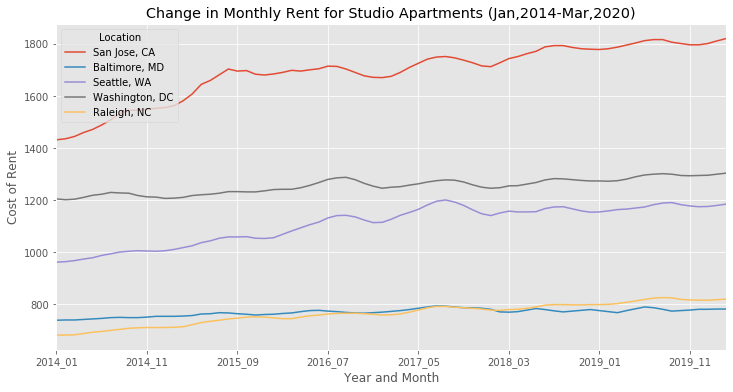

In [12]:
studio_df.set_index(['Location'], inplace=True)
t_studio = studio_df.transpose()
t_studio.plot(kind='line', figsize=(12,6))
plt.title('Change in Monthly Rent for Studio Apartments (Jan,2014-Mar,2020)')
plt.ylabel('Cost of Rent')
plt.xlabel('Year and Month')
plt.show()

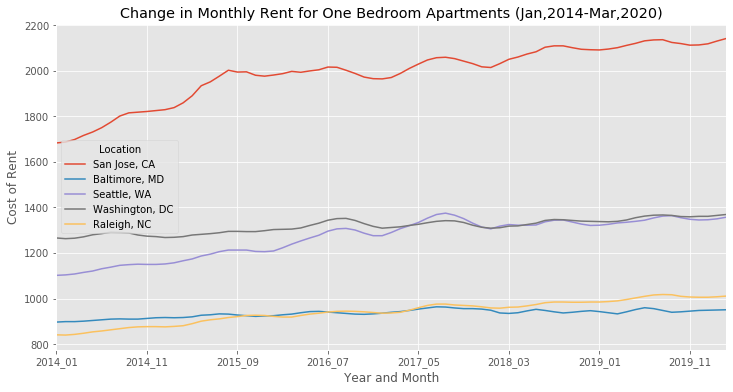

In [13]:
l_one_br = one_br_df.set_index(['Location'], inplace=True)
t_one_br = one_br_df.transpose()
t_one_br.plot(kind='line', figsize=(12,6))
plt.title('Change in Monthly Rent for One Bedroom Apartments (Jan,2014-Mar,2020)')
plt.ylabel('Cost of Rent')
plt.xlabel('Year and Month')
plt.show()

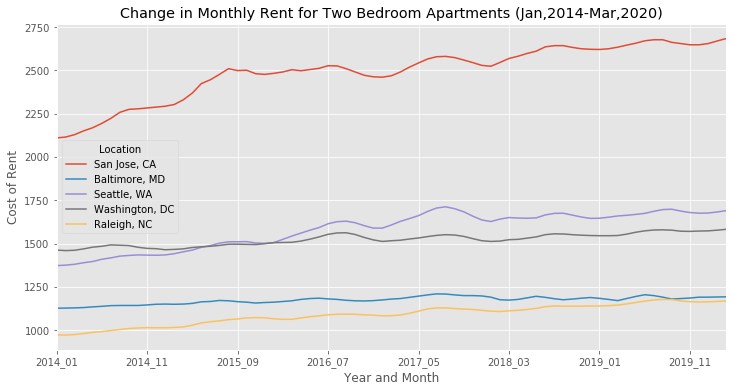

In [14]:
two_br_df.set_index(['Location'], inplace=True)
t_two_br = two_br_df.transpose()
t_two_br.plot(kind='line', figsize=(12,6))
plt.title('Change in Monthly Rent for Two Bedroom Apartments (Jan,2014-Mar,2020)')
plt.ylabel('Cost of Rent')
plt.xlabel('Year and Month')
plt.show()

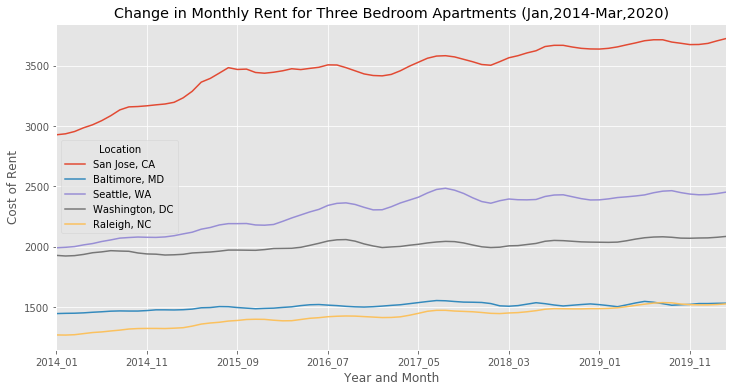

In [15]:
three_br_df.set_index(['Location'], inplace=True)
t_three_br = three_br_df.transpose()
t_three_br.plot(kind='line', figsize=(12,6))
plt.title('Change in Monthly Rent for Three Bedroom Apartments (Jan,2014-Mar,2020)')
plt.ylabel('Cost of Rent')
plt.xlabel('Year and Month')
plt.show()

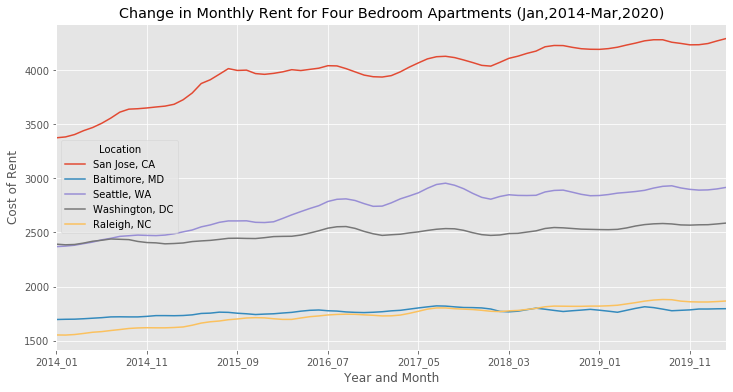

In [16]:
four_br_df.set_index(['Location'], inplace=True)
t_four_br = four_br_df.transpose()
t_four_br.plot(kind='line', figsize=(12,6))
plt.title('Change in Monthly Rent for Four Bedroom Apartments (Jan,2014-Mar,2020)')
plt.ylabel('Cost of Rent')
plt.xlabel('Year and Month')
plt.show()

### Results Section 2 Disscussion:

### As expected rent continuously increases over time regardless of room size. San Jose, CA experianced the largest increase over time jumping in price sometime in mid 2015 and then steadily increasing onward. Washington, DC's rent steadily decreases in comparison to Seattle, WA's with an increase in room number making it a viable canidate for those in tech work who have a family or roommates. Finally, Baltimore, MD and Raleigh, NC both have the cheapest rent and as mentioned before their rents are comparable to each other in price. That being said, since 2014 Raleighs rent has seen a tiny increase over time in rent costs and in some cases has surpassed Baltimore's cost of rent. Baltimore overall remains relatively unchanged in comparison.

# Part 3: Find the Cheapest and Safest Neighborhoods

## Cheapest Neighborhoods

In [2]:
#Import the important stuff
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

In [88]:
#Bring in average rent data
R_rent = pd.read_csv('Raleigh Neighborhood Rent.csv')
B_rent = pd.read_csv('Baltimore Neighborhood Rent.csv')

In [89]:
B_rent.shape

(265, 2)

In [90]:
R_rent.shape

(763, 2)

In [92]:
#Both cities have alot of neighborhoods. Lets see if we can filter it down based off the rent that meets our needs
B_cheap = B_rent[B_rent['Average Rent'] <= 1089]
R_cheap = R_rent[R_rent['Average Rent'] <= 1186]

In [93]:
B_cheap.shape

(94, 2)

In [94]:
R_cheap.shape

(362, 2)

In [103]:
B_cheap.head()

,Neighborhood,Average Rent
0,FAIRFIELD AREA,823.0
1,CURTIS BAY,823.0
2,BROOKLYN,823.0
3,MORGAN PARK,825.0
4,LAURAVILLE,825.0


### In Baltimore we have narrowed down the potential neighborhoods to 92 while in Raleigh the number of neighborhoods have been nearly halved to 362. We still have alot of neighborhoods in each city so another method is need to find another way of filtering the results.

### Using Crime to Find the Safest Neighborhoods with the Cheapest Rent

In [19]:
address = 'Baltimore, MD'

geolocator = Nominatim(user_agent="Baltimore")
location = geolocator.geocode(address)
latitude_Baltimore = location.latitude
longitude_Baltimore = location.longitude
print('The geograpical coordinate of Baltimore are {}, {}.'.format(latitude_Baltimore, longitude_Baltimore))

The geograpical coordinate of Baltimore are 39.2908816, -76.610759.


In [20]:
address = 'Raleigh, NC'

geolocator = Nominatim(user_agent="Raleigh")
location = geolocator.geocode(address)
latitude_Raleigh = location.latitude
longitude_Raleigh = location.longitude
print('The geograpical coordinate of Raleigh are {}, {}.'.format(latitude_Raleigh, longitude_Raleigh))

The geograpical coordinate of Raleigh are 35.7803977, -78.6390989.


In [5]:
b_crime = pd.read_csv('Baltimore Crime Report.csv')

In [97]:
b_crime.head()

,__id,latitude,longitude,incidento,chargedescription,incidentl,arrestdate,arrestlocation
0,row-gy86_atim.mtif,39.297228,-76.580829,3AFROBB HWY-FIREARM,ARMED ROBBERY,500 LUZERNE ST,12/31/2018 0:00,500 LUZERNE ST
1,row-gxet.9z9e.jafp,39.361704,-76.565503,Unknown Offense,RECKLESS ENDANGERMENT,6200 LAURELTON AVE,12/31/2018 0:00,6200 LAURELTON AVE
2,row-ek6i.6cwh.bt25,39.293675,-76.597666,Unknown Offense,CDS,200 SPRING CT,12/31/2018 0:00,200 SPRING CT
3,row-xim4-uefz_h8z8,39.347190,-76.683160,87NARCOTICS,CDS VIOLATION,5300 CORDELIA AVE,12/31/2018 0:00,5300 CORDELIA AVE
4,row-8brt.xc64.xe3e,NaN,NaN,Unknown Offense,FAILURE TO APPEAR,NaN,12/31/2018 0:00,NaN


In [51]:
#Drop rows with no information because filling in with the most frequent answer and 
#using averages are not really options here with 250+ neighborhoods and far more streets
b_crime.dropna(axis = 0, inplace = True)
b_crime.head()

,__id,latitude,longitude,incidento,chargedescription,incidentl,arrestdate,arrestlocation
0,row-gy86_atim.mtif,39.297228,-76.580829,3AFROBB HWY-FIREARM,ARMED ROBBERY,500 LUZERNE ST,12/31/2018 0:00,500 LUZERNE ST
1,row-gxet.9z9e.jafp,39.361704,-76.565503,Unknown Offense,RECKLESS ENDANGERMENT,6200 LAURELTON AVE,12/31/2018 0:00,6200 LAURELTON AVE
2,row-ek6i.6cwh.bt25,39.293675,-76.597666,Unknown Offense,CDS,200 SPRING CT,12/31/2018 0:00,200 SPRING CT
3,row-xim4-uefz_h8z8,39.347190,-76.683160,87NARCOTICS,CDS VIOLATION,5300 CORDELIA AVE,12/31/2018 0:00,5300 CORDELIA AVE
6,row-qkk6_w2ym.ysti,39.305207,-76.669302,87NARCOTICS,CDS VIOLATION,3100 BRIGHTON ST,12/31/2018 0:00,3100 BRIGHTON ST


In [63]:
b_crime['chargedescription'].value_counts()

CDS                    60
CDS VIOLATION          40
HGV                    19
COMMON ASSAULT         18
HANDGUN VIOLATION      10
                       ..
CDS- POSS OF HEROIN     1
PWID- HEROIN            1
CDS PWID -HEROIN        1
DANGEROUS WEAPON        1
ATTEMPTED HOMICIDE      1
Name: chargedescription, Length: 95, dtype: int64

In [7]:
#Because there are 81868 total crimes to work with I am going to limit the number I put on a map for 
#Computational reasons
limit = 500
b_crime = b_crime.iloc[0:limit, :]
b_crime.shape

(500, 8)

In [8]:
B_lat = 39.2908816
B_long = -76.610759

In [14]:
bal_map = folium.Map(location=[B_lat, B_long], zoom_start=12)

In [75]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the crimes and add each to the incidents feature group
for lat, lng, in zip(b_crime.latitude, b_crime.longitude):
    incidents.add_child(
        folium.features.Marker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(b_crime.latitude)
longitudes = list(b_crime.longitude)
labels = list(b_crime.chargedescription)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(bal_map)    
    
# add incidents to map
bal_map.add_child(incidents)

![alt text](Neighborhood_Balt.jpg "Neighborhoods of Baltimore")

### Based on the map it looks like the further you are from the inner harbor the less crime you will see. Looking at the crime map and the neighborhood map you can find an area that satisfies the criteria.

In [99]:
#Lets find a neighborhood up North
#'GUILFORD' in B_cheap.values #All the comments below this one were tested and didnt show up in our data frame
#'NORTHWOOD'in B_cheap.values
#'ROLAND PARK' in B_cheap.values
#'WALBROOK' in B_cheap.values
'GREENSPRING' in B_cheap.values #located next to woodberry

True

### Repeat process with Raleigh, NC

In [50]:
r_lat = 35.7803977
r_long = -78.6390989

In [66]:
r_crime = pd.read_csv('Daily_Raleigh_Police_Incidents.csv')
r_crime.head()

,X,Y,OBJECTID,crime_category,crime_description,crime_type,reported_block_address,city_of_incident,reported_date,latitude,longitude
0,-78.622925,35.874505,529022,LARCENY,Larceny/Theft from Building,CRIMES AGAINST PROPERTY,6600 BLOCK FALLS OF NEUSE RD,RALEIGH,2020-02-17T05:15:00.000Z,35.874505,-78.622925
1,-78.622925,35.874505,529023,FRAUD,Fraud/Credit Card-ATM Fraud,CRIMES AGAINST PROPERTY,6600 BLOCK FALLS OF NEUSE RD,RALEIGH,2020-02-17T05:15:00.000Z,35.874505,-78.622925
2,-78.587456,35.824043,529034,ROBBERY,Robbery/From Person,CRIMES AGAINST PROPERTY,3200 BLOCK CAPITAL BLVD,RALEIGH,2020-02-17T06:36:00.000Z,35.824043,-78.587456
3,-78.634200,35.778107,529035,ALL OTHER OFFENSES,All Other/All Other Offenses,NaN,300 BLOCK E HARGETT ST,RALEIGH,2020-02-17T05:48:00.000Z,35.778107,-78.634200
4,NaN,NaN,529038,MISCELLANEOUS,Miscellaneous/Mental Commitment,NaN,NaN,NaN,2020-02-17T06:35:00.000Z,0.000000,0.000000


In [67]:
r_crime.dropna(axis = 0, inplace = True)
r_crime.head()

,X,Y,OBJECTID,crime_category,crime_description,crime_type,reported_block_address,city_of_incident,reported_date,latitude,longitude
0,-78.622925,35.874505,529022,LARCENY,Larceny/Theft from Building,CRIMES AGAINST PROPERTY,6600 BLOCK FALLS OF NEUSE RD,RALEIGH,2020-02-17T05:15:00.000Z,35.874505,-78.622925
1,-78.622925,35.874505,529023,FRAUD,Fraud/Credit Card-ATM Fraud,CRIMES AGAINST PROPERTY,6600 BLOCK FALLS OF NEUSE RD,RALEIGH,2020-02-17T05:15:00.000Z,35.874505,-78.622925
2,-78.587456,35.824043,529034,ROBBERY,Robbery/From Person,CRIMES AGAINST PROPERTY,3200 BLOCK CAPITAL BLVD,RALEIGH,2020-02-17T06:36:00.000Z,35.824043,-78.587456
7,-78.731053,35.778664,529050,WEAPONS VIOLATION,Weapons/Shots Fired,CRIMES AGAINST SOCIETY,400 BLOCK BUCK JONES RD,RALEIGH,2020-02-17T05:38:00.000Z,35.778664,-78.731053
20,-78.648732,35.882944,529661,LARCENY,Larceny/All Other,CRIMES AGAINST PROPERTY,200 BLOCK HORIZON DR,RALEIGH,2020-02-17T15:10:00.000Z,35.882944,-78.648732


In [68]:
r_crime['crime_description'].value_counts()

Larceny/Theft from Motor Vehicle                      61
Assault/Simple                                        55
Larceny/All Other                                     49
Larceny/Shoplifting                                   26
Burglary/Residential                                  25
Drug Violation/Misdemeanor                            23
Motor Vehicle Theft                                   22
Drug Equipment/Paraphernalia                          15
Larceny/Theft from Building                           15
Assault/Aggravated                                    14
Weapons/Shots Fired                                   13
Assault/Intimidation-Communicating Threats            13
Fraud/Credit Card-ATM Fraud                           13
Drug Violation/Felony                                 11
Fraud/False Pretense or Swindle                       10
Larceny/Theft of MV Parts-Accessories                 10
Fraud/ID Theft                                        10
Robbery/From Person            

In [70]:
limit = 432
r_crime = r_crime.iloc[0:limit, :]
r_crime.shape

(432, 11)

In [72]:
ral_map = folium.Map(location=[r_lat, r_long], zoom_start=12)

In [76]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the crimes and add each to the incidents feature group
for lat, lng, in zip(r_crime.latitude, r_crime.longitude):
    incidents.add_child(
        folium.features.Marker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(r_crime.latitude)
longitudes = list(r_crime.longitude)
labels = list(b_crime.chargedescription)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(ral_map)    
    
# add incidents to map
ral_map.add_child(incidents)

![alt text](Raleigh.jpg 'View of zipcode areas in Raleigh, NC')

In [100]:
#Raleigh lacks an established map of its neighborhoods this is just an example
'EMERALD CHASE' in R_cheap.values

True

### Results Section 3 Discussion:

### Based off the crime maps for Baltimore the further north you go the safer the neighborhoods are. Most of the crimes committed in the area are either related to assualt, theft of heavy goods vehicle, or drug related. While in Raleigh the safer areas are in the center of the area and north-northwest of the center. The crimes commited in that area are mostly related to larceny and theft. 

### Note that the analysis for this section is by no means comprehensive. Additionally, there are better ways of visualizing the data such as using choropleth maps. Unfortunately, there were no good geojson files for Baltimore or Raleigh to accomplish this so the idea was scrapped. If the files do appear I would highly recommend creating a map out of these as it would reduce the frusteration of looking back and forth between the existing maps to find the proper neighborhoods.

# Part 4: Venues Located in the City

#### Foursquare Authentication

In [15]:
CLIENT_ID = 'GESOWKNGLZ3TORCFIQCXGGPS0B1FFXI3UPCCGEDMHHX4JOPU' # your Foursquare ID
CLIENT_SECRET = 'A4NNDPZSG5MJBFUG4VSZRWQJDVVD2UBQYXOW2GZHQJIB1NP0' # your Foursquare Secret
VERSION = '20180605'

In [16]:
#Define outer boundary and limit number of venues to get
radius = 500
LIMIT = 100

In [3]:
#Greenspring Baltimore, MD and Emerald Chase NC (part of Raleigh) are the two neighborhoods of interest
#Want to find their coordinates through Nominatim
geolocator = Nominatim(user_agent = "Battle of Neighborhoods", timeout = 3)
locationB = geolocator.geocode("Baltimore City, MD")
print(locationB)
print("Baltimore Latitude:", locationB.latitude)
print("Baltimore Longitude:", locationB.longitude)

Baltimore, Maryland, 21203, United States of America
Baltimore Latitude: 39.2908816
Baltimore Longitude: -76.610759


In [4]:
geolocator = Nominatim(user_agent = "Battle of Neighborhoods", timeout = 3)
locationR = geolocator.geocode("Raleigh, NC")
print(locationR)
print("Raleigh Latitude:", locationR.latitude)
print("Raleigh Longitude:", locationR.longitude)

Raleigh, Wake County, North Carolina, 27603-1300, United States of America
Raleigh Latitude: 35.7803977
Raleigh Longitude: -78.6390989


In [34]:
#Create a new data frame from the coordinates to be used with the foursquare API
data_b = {'Location':['Baltimore, MD, USA'],'Latitude':[39.299236],'Longitude':[-76.609383]}
data_r = {'Location':['Raleigh, NC, USA'],'Latitude':[35.787743],'Longitude':[-78.644257]}
df_b = pd.DataFrame.from_dict(data_b)
df_r = pd.DataFrame.from_dict(data_r)

In [50]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [51]:
baltimore_venues = getNearbyVenues(names=df_b['Location'],
                                   latitudes=df_b['Latitude'],
                                   longitudes=df_b['Longitude']
                                  )

Baltimore, MD, USA


In [52]:
raleigh_venues = getNearbyVenues(names=df_r['Location'],
                                   latitudes=df_r['Latitude'],
                                   longitudes=df_r['Longitude']
                                  )

Raleigh, NC, USA


In [53]:
baltimore_venues.shape

(9, 7)

In [54]:
#Lets see what venues you can expect in the area
baltimore_venues.groupby('Venue Category').count()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
American Restaurant,1,1,1,1,1,1
Coffee Shop,1,1,1,1,1,1
Gym,1,1,1,1,1,1
Liquor Store,1,1,1,1,1,1
Pizza Place,1,1,1,1,1,1
Salon / Barbershop,1,1,1,1,1,1
Steakhouse,1,1,1,1,1,1
Theater,2,2,2,2,2,2


In [55]:
raleigh_venues.shape

(62, 7)

In [49]:
raleigh_venues.groupby('Venue Category').count()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
American Restaurant,2,2,2,2,2,2
Auto Garage,1,1,1,1,1,1
BBQ Joint,1,1,1,1,1,1
Bakery,2,2,2,2,2,2
Bar,8,8,8,8,8,8
Beer Garden,1,1,1,1,1,1
Beer Store,1,1,1,1,1,1
Board Shop,1,1,1,1,1,1
Boutique,2,2,2,2,2,2


### Results Discussion Section 4:

### Both Baltimore and Raleigh lack appropriate coordinates for their respective neighborhoods making a targeted search for venues in the neighborhood of choice impossible. Instead a search of venues was done on the entire city itself to get an idea of what might be in the area. As seen above Foursquare only returned a total of eight venues in all of Baltimore making venues an unreliable indicator of city health/preference/culture in that case. Raleigh on the other hand returned sixty-two venues that show it as a varied place to live. Most of Raleigh's venues include bars and restaurants which would appeal to foodies. But it also has other places that shows its culture such as rock clubs. 

## Discussion and Conclusion:

### Which city would you live in? Ultimately coming down to personal preference and circumstance the choice between these two cities based on price, neighborhood/city crime, and venue is just some of the metrics you may use to decide where to live. Raleigh, NC won out in most of these metrics. While in terms of price Baltimore is cheaper Raleigh is still comparable in that area. Additionally, you pay less in tax in Raleigh compared to Baltimore so you will have more money to play with giving you more options in potential neighborhoods as well as more disposable income. However, Raleigh has a greater historic increase in rent month over month as well as year over year. This indicates that the area is growing and cost of living is likely going to contunue to increase. It will be important to monitor how much you spend on rent each year or you could be priced out of the area. Raleigh had less violent and drug related crime in its city area. But you would still have to be on the look out due to the large amount of larceny and theft in the area. By technicality Raleigh had more venues and could be said to be the winner here. However, this metric of using venues is by no means complete or conclusive and requires more information to be used effectively. When everything is said and done Raleigh, NC appears to be the winner by my metrics and would be the ideal place to move if you are a young tech worker. 